
> # COMPONENTS OF THIS PROJECT
***
     
     1- EXPLORATORY DATA ANALYSIS

     2- DATA CLEANING

     3- FEATURE ENGINEERING

     4- ENCODING CATEGORICAL FEATURES

     5- DETECTING OUTLIERS

     6- MACHINE LEARNING

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.simplefilter(action='ignore')

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
import math
import sklearn.model_selection as ms
import sklearn.metrics as sklm

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/train.csv


## Aim:
***
The aim of this competition is to predict the sale price of residential homes in Ames, Iowa. We will practice feature engineering and regression algorithms to achieve the lowest prediction error (RMSE is the metric used in this competition).

# 1- Exploratory data analysis
***
Before starting, I would like to mention that I will be using alphabets to name my datasets to make my workflow easier:
        
         a=train
         b=test
         c= combined dataset (train+test)

We read and open our train and test datasets

In [2]:
a = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
b = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [3]:
#Use this code to show all the 163 columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


Here is a glimpse of what we will be dealing with:
* Many features, many missing values and one target feature: "SalePrice" which is the price of the houses we are supposed to predict

In [4]:
a.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
print('The shape of our training set: ',a.shape[0], 'houses', 'and', a.shape[1], 'features')
print('The shape of our testing set: ',b.shape[0], 'houses', 'and', b.shape[1], 'features')
print('The testing set has 1 feature less than the training set, which is SalePrice, the target to predict  ')

The shape of our training set:  1460 houses and 81 features
The shape of our testing set:  1459 houses and 80 features
The testing set has 1 feature less than the training set, which is SalePrice, the target to predict  


Let's have a look first at the correlation between numerical features and the target "SalePrice", in order to have a first idea of the connections between features. Just by looking at the heatmap below we can see many dark colors, many features have high correlation with the target.

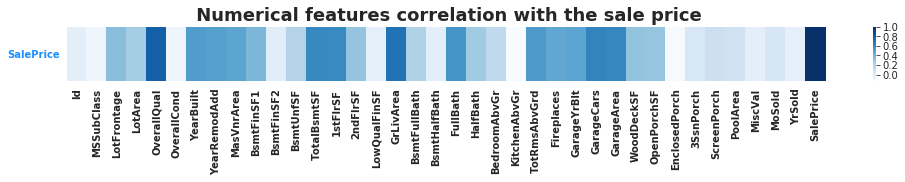

In [6]:
num=a.select_dtypes(exclude='object')
numcorr=num.corr()
f,ax=plt.subplots(figsize=(17,1))
sns.heatmap(numcorr.sort_values(by=['SalePrice'], ascending=False).head(1), cmap='Blues')
plt.title(" Numerical features correlation with the sale price", weight='bold', fontsize=18)
plt.xticks(weight='bold')
plt.yticks(weight='bold', color='dodgerblue', rotation=0)


plt.show()

To have a better idea, we sort the features according to their correlation with the sale price

In [7]:
Num=numcorr['SalePrice'].sort_values(ascending=False).head(10).to_frame()

cm = sns.light_palette("cyan", as_cmap=True)

s = Num.style.background_gradient(cmap=cm)
s

,SalePrice
SalePrice,1
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


Interesting! The **overall quality**, **the living area, basement area, garage cars and garage area** have the highest correlation values with the sale price, which is logical, better quality and bigger area = Higher price.
* Also some features such as, **full bath** or **1st floor surface** have a higher correlation, those are luxury features, more luxury = Higher price.
* and **Year built**, the newer buildings seem to have higher sale prices.


> **Example of a strong correlation between 2 numerical features: Sale price and ground living area**

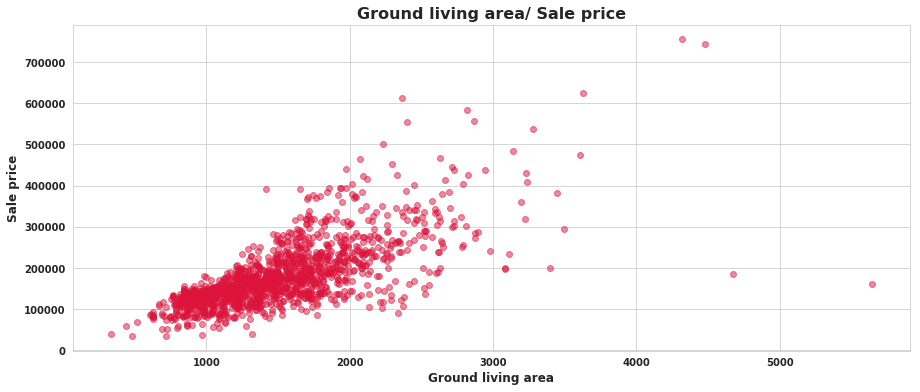

In [8]:
plt.figure(figsize=(15,6))
plt.scatter(x=a['GrLivArea'], y=a['SalePrice'], color='crimson', alpha=0.5)
plt.title('Ground living area/ Sale price', weight='bold', fontsize=16)
plt.xlabel('Ground living area', weight='bold', fontsize=12)
plt.ylabel('Sale price', weight='bold', fontsize=12)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.show()

Let's dig in more into the data, those are just the numerical features. I assume that categorical features will be very important, for example, the neighborhood feature will be important, maybe the most important, given that good locations nowadays cost good money.
> Example of categorical features: **Neighborhood**

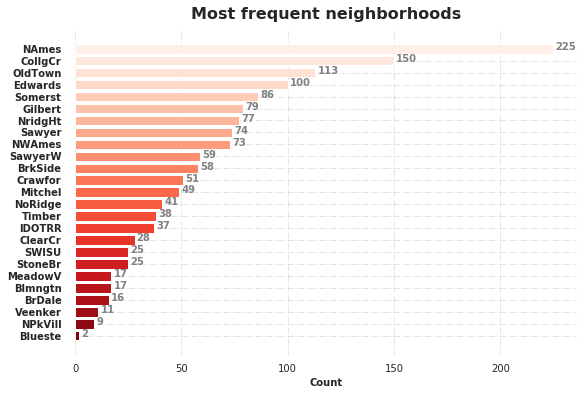

In [9]:
# Figure Size
fig, ax = plt.subplots(figsize=(9,6))

# Horizontal Bar Plot
title_cnt=a.Neighborhood.value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1], color=sns.color_palette('Reds',len(title_cnt)))




# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Add x,y gridlines
ax.grid(b=True, color='grey', linestyle='-.', linewidth=1, alpha=0.2)

# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Most frequent neighborhoods',weight='bold',
             loc='center', pad=10, fontsize=16)
ax.set_xlabel('Count', weight='bold')


# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')


plt.show()
# Show Plot
plt.show()

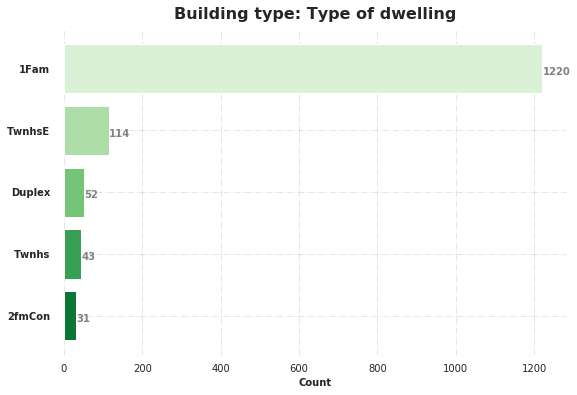

In [10]:
# Figure Size
fig, ax = plt.subplots(figsize=(9,6))

# Horizontal Bar Plot
title_cnt=a.BldgType.value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1], color=sns.color_palette('Greens',len(title_cnt)))




# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Add x,y gridlines
ax.grid(b=True, color='grey', linestyle='-.', linewidth=1, alpha=0.2)

# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Building type: Type of dwelling',weight='bold',
             loc='center', pad=10, fontsize=16)
ax.set_xlabel('Count', weight='bold')


# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')


plt.show()

* But before going any futher, we start by cleaning the data from missing values. I set the threshold to 80% (red line), all columns with more than 80% missing values will be dropped.

In [11]:
na = a.shape[0]
nb = b.shape[0]
y_train = a['SalePrice'].to_frame()
#Combine train and test sets
c1 = pd.concat((a, b), sort=False).reset_index(drop=True)
#Drop the target "SalePrice" and Id columns
c1.drop(['SalePrice'], axis=1, inplace=True)
c1.drop(['Id'], axis=1, inplace=True)
print("Total size is :",c1.shape)

Total size is : (2919, 79)


# 2- Data cleaning
***
   > ### 2.1 Features with >90% missing values
   
First thing to do is get rid of the features with more than 80% missing values *(figure below)*. For example the PoolQC's missing values are probably due to the lack of pools in some buildings, which is very logical. But replacing those (more than 80%) missing values with "no pool" will leave us with a feature with low variance, and low variance features are uniformative for machine learning models. So we drop the features with more than 80% missing values.

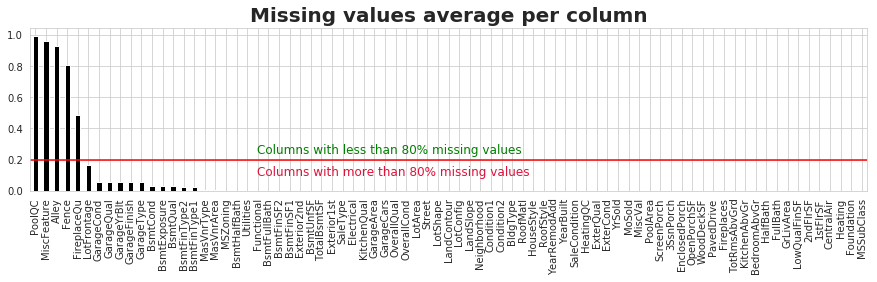

In [12]:
plt.figure(figsize=(15,3))
c1.isnull().mean().sort_values(ascending=False).plot.bar(color='black')
plt.axhline(y=0.2, color='r', linestyle='-')
plt.title('Missing values average per column', fontsize=20, weight='bold' )

plt.text(20.90, 0.305, 'Columns with less than 80% missing values', fontsize=12, color='green',
         ha='left' ,va='top')
plt.text(20.90, 0.165, 'Columns with more than 80% missing values', fontsize=12, color='crimson',
         ha='left' ,va='top')

plt.show()

* Good news! Most of the features are clean from missing values

* We combine first the train and test datasets to run all the data munging and feature engineering on both of them.

In [13]:
c=c1.dropna(thresh=len(c1)*0.8, axis=1)
print('We dropped ',c1.shape[1]-c.shape[1], ' features in the combined set')

We dropped  5  features in the combined set


Before cleaning the data, we zoom at the features with missing values, those missing values won't be treated iqually. Some features have barely 1 or 2 missing values, we will use the forward fill method to fill them.

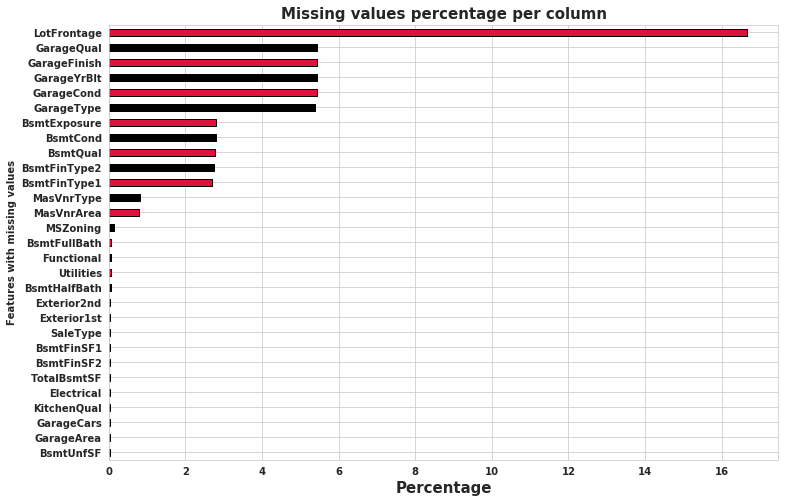

In [14]:
allna = (c.isnull().sum() / len(c))*100
allna = allna.drop(allna[allna == 0].index).sort_values()
plt.figure(figsize=(12, 8))
allna.plot.barh(color=('crimson', 'black'), edgecolor='black')
plt.title('Missing values percentage per column', fontsize=15, weight='bold' )
plt.xlabel('Percentage', weight='bold', size=15)
plt.ylabel('Features with missing values', weight='bold')
plt.yticks(weight='bold')
plt.xticks(weight='bold')
plt.show()

In [15]:
print('The shape of the combined dataset after dropping features with more than 90% M.V.', c.shape)

The shape of the combined dataset after dropping features with more than 90% M.V. (2919, 74)


We isolate the missing values from the rest of the dataset to have a good idea of how to treat them

In [16]:
NA=c[['LotFrontage','GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','GarageYrBlt','BsmtFinType2','BsmtFinType1','BsmtCond', 'BsmtQual','BsmtExposure', 'MasVnrArea','MasVnrType','Electrical','MSZoning','BsmtFullBath','BsmtHalfBath','Utilities','Functional','Exterior1st','BsmtUnfSF','Exterior2nd','TotalBsmtSF','GarageArea','GarageCars','KitchenQual','BsmtFinSF2','BsmtFinSF1','SaleType']]

We split them to:
* Categorical features
* Numerical features

In [17]:
NAcat=NA.select_dtypes(include='object')
NAnum=NA.select_dtypes(exclude='object')
print('We have :',NAcat.shape[1],'categorical features with missing values')
print('We have :',NAnum.shape[1],'numerical features with missing values')

We have : 18 categorical features with missing values
We have : 11 numerical features with missing values


So, 18 categorical features and 10 numerical features to clean.
* We start with the numerical features, first thing to do is have a look at them to learn more about their distribution and decide how to clean them:
- Most of the features are going to be filled with 0s because we assume that they don't exist, for example GarageArea, GarageCars with missing values are simply because the house lacks a garage.
- GarageYrBlt: Year garage was built can't be filled with 0s, so we fill with the median (1980).

> ### 2.2 Numerical features:

In [18]:
NAnum.head()

,LotFrontage,GarageYrBlt,MasVnrArea,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,TotalBsmtSF,GarageArea,GarageCars,BsmtFinSF2,BsmtFinSF1
0,65.0,2003.0,196.0,1.0,0.0,150.0,856.0,548.0,2.0,0.0,706.0
1,80.0,1976.0,0.0,0.0,1.0,284.0,1262.0,460.0,2.0,0.0,978.0
2,68.0,2001.0,162.0,1.0,0.0,434.0,920.0,608.0,2.0,0.0,486.0
3,60.0,1998.0,0.0,1.0,0.0,540.0,756.0,642.0,3.0,0.0,216.0
4,84.0,2000.0,350.0,1.0,0.0,490.0,1145.0,836.0,3.0,0.0,655.0


In [19]:
#MasVnrArea: Masonry veneer area in square feet, the missing data means no veneer so we fill with 0
c['MasVnrArea']=c.MasVnrArea.fillna(0)
#LotFrontage has 16% missing values. We fill with the median
c['LotFrontage']=c.LotFrontage.fillna(c.LotFrontage.median())
#GarageYrBlt:  Year garage was built, we fill the gaps with the median: 1980
c['GarageYrBlt']=c["GarageYrBlt"].fillna(1980)
#For the rest of the columns: Bathroom, half bathroom, basement related columns and garage related columns:
#We will fill with 0s because they just mean that the hosue doesn't have a basement, bathrooms or a garage

> ### 2.3 Categorical features:

And we have 18 Categorical features with missing values:
* Some features have just 1 or 2 missing values, so we will just use the forward fill method because they are obviously values that can't be filled with 'None's
* Features with many missing values are mostly basement and garage related (same as in numerical features) so as we did with numerical features (filling them with 0s), we will fill the categorical missing values with "None"s assuming that the houses lack basements and garages.

In [20]:
NAcat.head()

,GarageType,GarageFinish,GarageQual,GarageCond,BsmtFinType2,BsmtFinType1,BsmtCond,BsmtQual,BsmtExposure,MasVnrType,Electrical,MSZoning,Utilities,Functional,Exterior1st,Exterior2nd,KitchenQual,SaleType
0,Attchd,RFn,TA,TA,Unf,GLQ,TA,Gd,No,BrkFace,SBrkr,RL,AllPub,Typ,VinylSd,VinylSd,Gd,WD
1,Attchd,RFn,TA,TA,Unf,ALQ,TA,Gd,Gd,None,SBrkr,RL,AllPub,Typ,MetalSd,MetalSd,TA,WD
2,Attchd,RFn,TA,TA,Unf,GLQ,TA,Gd,Mn,BrkFace,SBrkr,RL,AllPub,Typ,VinylSd,VinylSd,Gd,WD
3,Detchd,Unf,TA,TA,Unf,ALQ,Gd,TA,No,None,SBrkr,RL,AllPub,Typ,Wd Sdng,Wd Shng,Gd,WD
4,Attchd,RFn,TA,TA,Unf,GLQ,TA,Gd,Av,BrkFace,SBrkr,RL,AllPub,Typ,VinylSd,VinylSd,Gd,WD


>> Number of missing values per column:

In [21]:
NAcat1= NAcat.isnull().sum().to_frame().sort_values(by=[0]).T
cm = sns.light_palette("lime", as_cmap=True)

NAcat1 = NAcat1.style.background_gradient(cmap=cm)
NAcat1

,SaleType,Exterior2nd,Exterior1st,KitchenQual,Electrical,Functional,Utilities,MSZoning,MasVnrType,BsmtFinType1,BsmtFinType2,BsmtQual,BsmtExposure,BsmtCond,GarageType,GarageCond,GarageQual,GarageFinish
0,1,1,1,1,1,2,2,4,24,79,80,81,82,82,157,159,159,159


In [22]:
#We start with features having just few missing value:  We fill the gap with forward fill method:
c['Electrical']=c['Electrical'].fillna(method='ffill')
c['SaleType']=c['SaleType'].fillna(method='ffill')
c['KitchenQual']=c['KitchenQual'].fillna(method='ffill')
c['Exterior1st']=c['Exterior1st'].fillna(method='ffill')
c['Exterior2nd']=c['Exterior2nd'].fillna(method='ffill')
c['Functional']=c['Functional'].fillna(method='ffill')
c['Utilities']=c['Utilities'].fillna(method='ffill')
c['MSZoning']=c['MSZoning'].fillna(method='ffill')

* We dealt already with small missing values or values that can't be filled with "0" such as Garage year built.
* The rest of the features are mostly basement and garage related with 100s of missing values, we will just fill 0s in the numerical features and 'None' in categorical features, assuming that the houses don't have basements, full bathrooms or garage.

In [23]:
#Categorical missing values
NAcols=c.columns
for col in NAcols:
    if c[col].dtype == "object":
        c[col] = c[col].fillna("None")

In [24]:
#Numerical missing values
for col in NAcols:
    if c[col].dtype != "object":
        c[col]= c[col].fillna(0)

In [25]:
c.isnull().sum().sort_values(ascending=False).head()

SaleCondition    0
YearRemodAdd     0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
dtype: int64

We finally end up with a clean dataset, next thing to do: **Create new features.**

# 3- Feature engineering:
***
Since the area is a very important variable, we will create a new feature "**TotalArea**" that sums the area of all the floors and the basement.
* **Bathrooms**: All the bathroom in the ground floor
* **Year average**: The average of the sum of the year the house was built and the year the house was remodeled



In [26]:
c['TotalArea'] = c['TotalBsmtSF'] + c['1stFlrSF'] + c['2ndFlrSF'] + c['GrLivArea'] +c['GarageArea']

c['Bathrooms'] = c['FullBath'] + c['HalfBath']*0.5 

c['Year average']= (c['YearRemodAdd']+c['YearBuilt'])/2

Feature engineering is very important to improve the model's performance, I will start in this kernel just with the TotalArea, Bathrooms and average year features and will keep updating the kernel by creating new features.
* ** This part of the kernel is not finished yet.**

# 4- Encoding categorical features:
***
> ### 4.1 Numerical features:

We start with numerical features that are actually categorical, for example "Month sold", the values are from 1 to 12, each number is assigned to a month November is number 11 while March is number 3. 11 is just the order of the months and not a given value, so we convert the "Month Sold" feature to categorical

In [27]:
#c['MoSold'] = c['MoSold'].astype(str)
c['MSSubClass'] = c['MSSubClass'].apply(str)
c['YrSold'] = c['YrSold'].astype(str)

> ### 4.2 One hot encoding:

In [28]:
cb=pd.get_dummies(c)
print("the shape of the original dataset",c.shape)
print("the shape of the encoded dataset",cb.shape)
print("We have ",cb.shape[1]- c.shape[1], 'new encoded features')

the shape of the original dataset (2919, 77)
the shape of the encoded dataset (2919, 301)
We have  224 new encoded features


We are done with the cleaning and feature engineering. Now, we split the combined dataset to the original train and test sets

In [29]:
Train = cb[:na]  #na is the number of rows of the original training set
Test = cb[na:] 

# 5- Outliers detection:
***
> ### 5.1 Outliers visualization:

This part of the kernel will be a little bit messy. I didn't want to deal with the outliers in the combined dataset to keep the shape of the original train and test datasets. Dropping them would shift the location of the rows.
* If you know a better solution to this, I will be more than happy to read your recommandations.

* OK. So we go back to our original train dataset to visualize the important features / Sale price scatter plot to find outliers

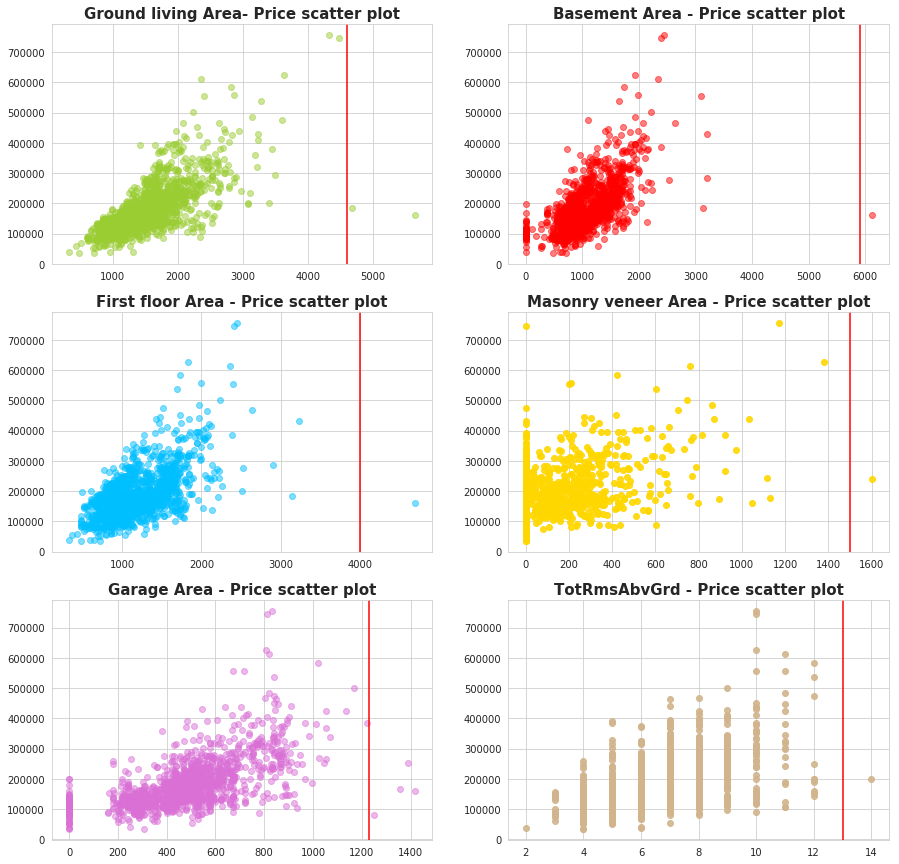

In [30]:
fig = plt.figure(figsize=(15,15))
ax1 = plt.subplot2grid((3,2),(0,0))
plt.scatter(x=a['GrLivArea'], y=a['SalePrice'], color=('yellowgreen'), alpha=0.5)
plt.axvline(x=4600, color='r', linestyle='-')
plt.title('Ground living Area- Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(0,1))
plt.scatter(x=a['TotalBsmtSF'], y=a['SalePrice'], color=('red'),alpha=0.5)
plt.axvline(x=5900, color='r', linestyle='-')
plt.title('Basement Area - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(1,0))
plt.scatter(x=a['1stFlrSF'], y=a['SalePrice'], color=('deepskyblue'),alpha=0.5)
plt.axvline(x=4000, color='r', linestyle='-')
plt.title('First floor Area - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(1,1))
plt.scatter(x=a['MasVnrArea'], y=a['SalePrice'], color=('gold'),alpha=0.9)
plt.axvline(x=1500, color='r', linestyle='-')
plt.title('Masonry veneer Area - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(2,0))
plt.scatter(x=a['GarageArea'], y=a['SalePrice'], color=('orchid'),alpha=0.5)
plt.axvline(x=1230, color='r', linestyle='-')
plt.title('Garage Area - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(2,1))
plt.scatter(x=a['TotRmsAbvGrd'], y=a['SalePrice'], color=('tan'),alpha=0.9)
plt.axvline(x=13, color='r', linestyle='-')
plt.title('TotRmsAbvGrd - Price scatter plot', fontsize=15, weight='bold' )
plt.show()

The outliers are the points in the right that have a larger area or value but a very low sale price. We localize those points by sorting their respective columns

* Interesting! The outlier in "basement" and "first floor" features is the same as the first outlier in ground living area: **The outlier with index number 1298. **

> ### 5.2 Outliers localization:

We sort the columns containing the outliers shown in the graph, we will use the function *head()* to show the outliers: ***head(number of outliers or dots shown in each plot)***

In [31]:
a['GrLivArea'].sort_values(ascending=False).head(2)

1298    5642
523     4676
Name: GrLivArea, dtype: int64

In [32]:
a['TotalBsmtSF'].sort_values(ascending=False).head(1)

1298    6110
Name: TotalBsmtSF, dtype: int64

In [33]:
a['MasVnrArea'].sort_values(ascending=False).head(1)

297    1600.0
Name: MasVnrArea, dtype: float64

In [34]:
a['1stFlrSF'].sort_values(ascending=False).head(1)

1298    4692
Name: 1stFlrSF, dtype: int64

In [35]:
a['GarageArea'].sort_values(ascending=False).head(4)

1298    1418
581     1390
1190    1356
1061    1248
Name: GarageArea, dtype: int64

In [36]:
a['TotRmsAbvGrd'].sort_values(ascending=False).head(1)

635    14
Name: TotRmsAbvGrd, dtype: int64


We can safely remove those points.

In [37]:
#train=Train[(Train['GrLivArea'] < 4600) & (Train['MasVnrArea'] < 1500) & (Train['GarageArea'] < 1240)
#           & (Train['TotRmsAbvGrd'] < 13)]

#print('We removed ',Train.shape[0]- train.shape[0],'outliers')

In [38]:
train=Train[(Train['GrLivArea'] < 4600) & (Train['MasVnrArea'] < 1500)]

print('We removed ',Train.shape[0]- train.shape[0],'outliers')

We removed  3 outliers


We do the same thing with "SalePrice" column, we localize those outliers and make sure they are the right outliers to remove. 
* They both have the same price range as the detected outliers. So, we can safely drop them.

In [39]:
target=a[['SalePrice']]
target.loc[1298]

SalePrice    160000
Name: 1298, dtype: int64

In [40]:
target.loc[523]

SalePrice    184750
Name: 523, dtype: int64

We gather all the outliers index positions and drop them from the target dataset

In [41]:
#train=Train.copy()
#pos=[30,   88,  142,  277,  308,  328,  365,  410,  438,  462,  495,
#        523,  533,  581,  588,  628,  632,  681,  688,  710,  714,  728,
#        774,  812,  874,  898,  916,  935,  968,  970, 1062, 1168, 1170,
#        1181, 1182, 1298, 1324, 1383, 1423, 1432, 14]
#target.drop(target.index[pos], inplace=True)
#train.drop(target.index[pos], inplace=True)

In [42]:
#pos = [1298,523, 297, 581, 1190, 1061, 635, 197,1328, 495, 583, 313, 335, 249, 706]
pos = [1298,523, 297]
target.drop(target.index[pos], inplace=True)

*P.S. I didn't drop all the outliers because dropping all of them led to a worst RMSE score. More investigation is needed to filter those outliers.*

In [43]:
print('We make sure that both train and target sets have the same row number after removing the outliers:')
print( 'Train: ',train.shape[0], 'rows')
print('Target:', target.shape[0],'rows')

We make sure that both train and target sets have the same row number after removing the outliers:
Train:  1457 rows
Target: 1457 rows


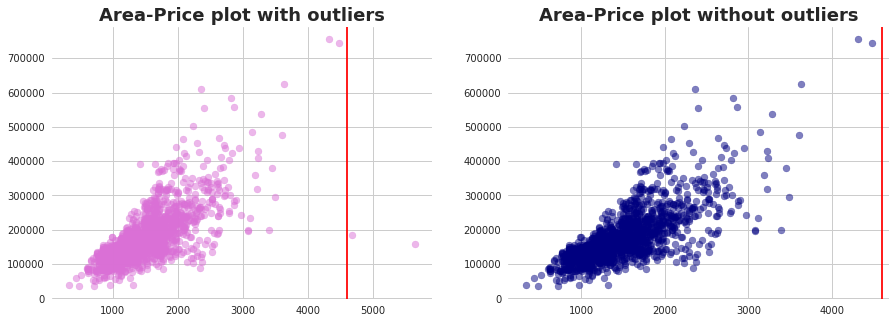

In [44]:
plt.style.use('seaborn')
sns.set_style('whitegrid')
fig = plt.figure(figsize=(15,5))
#1 rows 2 cols
#first row, first col
ax1 = plt.subplot2grid((1,2),(0,0))
plt.scatter(x=a['GrLivArea'], y=a['SalePrice'], color=('orchid'), alpha=0.5)
plt.title('Area-Price plot with outliers',weight='bold', fontsize=18)
plt.axvline(x=4600, color='r', linestyle='-')
#first row sec col
ax1 = plt.subplot2grid((1,2),(0,1))
plt.scatter(x=train['GrLivArea'], y=target['SalePrice'], color='navy', alpha=0.5)
plt.axvline(x=4600, color='r', linestyle='-')
plt.title('Area-Price plot without outliers',weight='bold', fontsize=18)
plt.show()

> ## Log transform skewed numeric features:

We want our skewness value to be around 0 and kurtosis less than 3. For more information about skewness and kurtosis,I recommend reading [this article.](https://codeburst.io/2-important-statistics-terms-you-need-to-know-in-data-science-skewness-and-kurtosis-388fef94eeaa)

Here are two examples of skewed features: Ground living area and 1st floor SF. We will apply **np.log1p** to the skewed variables.

In [45]:
print("Skewness before log transform: ", a['GrLivArea'].skew())
print("Kurtosis before log transform: ", a['GrLivArea'].kurt())

Skewness before log transform:  1.3665603560164552
Kurtosis before log transform:  4.895120580693174


In [46]:
from scipy.stats import skew

#numeric_feats = c.dtypes[c.dtypes != "object"].index

#skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
#skewed_feats = skewed_feats[skewed_feats > 0.75]
#skewed_feats = skewed_feats.index

#train[skewed_feats] = np.log1p(train[skewed_feats])



In [47]:
print("Skewness after log transform: ", train['GrLivArea'].skew())
print("Kurtosis after log transform: ", train['GrLivArea'].kurt())

Skewness after log transform:  1.0127645385480262
Kurtosis after log transform:  2.0672339304153655


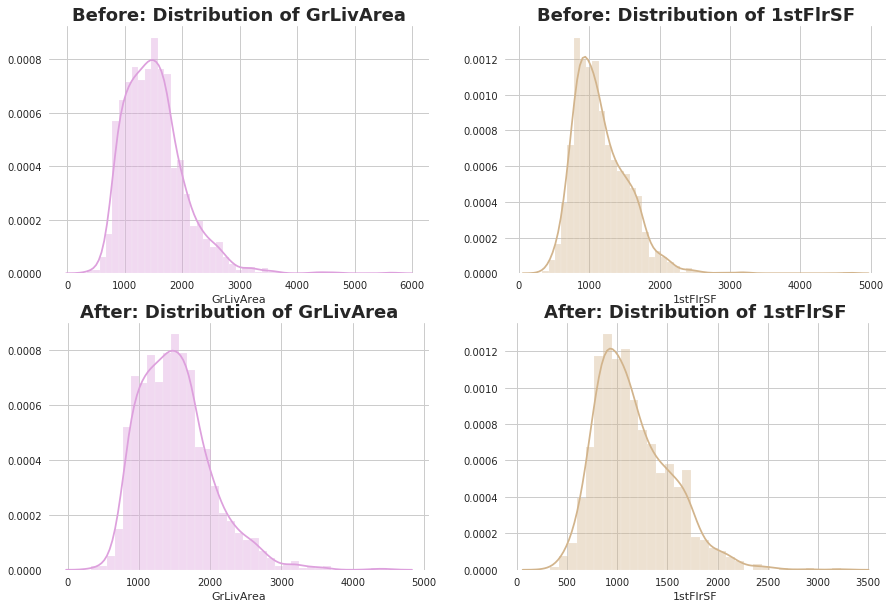

In [48]:
plt.style.use('seaborn')
sns.set_style('whitegrid')
fig = plt.figure(figsize=(15,10))
#1 rows 2 cols
#first row, first col
ax1 = plt.subplot2grid((2,2),(0,0))
sns.distplot(a.GrLivArea, color='plum')
plt.title('Before: Distribution of GrLivArea',weight='bold', fontsize=18)
#first row sec col
ax1 = plt.subplot2grid((2,2),(0,1))
sns.distplot(a['1stFlrSF'], color='tan')
plt.title('Before: Distribution of 1stFlrSF',weight='bold', fontsize=18)


ax1 = plt.subplot2grid((2,2),(1,0))
sns.distplot(train.GrLivArea, color='plum')
plt.title('After: Distribution of GrLivArea',weight='bold', fontsize=18)
#first row sec col
ax1 = plt.subplot2grid((2,2),(1,1))
sns.distplot(train['1stFlrSF'], color='tan')
plt.title('After: Distribution of 1stFlrSF',weight='bold', fontsize=18)
plt.show()

Last thing to do before Machine Learning is to log transform the target as well, as we did with the skewed features.

*P.S. Log transoform is only applied on the target in this version, not on the features. I will be applying the log transoform on the features in future versions of this kernel*

In [49]:
print("Skewness before log transform: ", target['SalePrice'].skew())
print("Kurtosis before log transform: ",target['SalePrice'].kurt())

Skewness before log transform:  1.8829247000823222
Kurtosis before log transform:  6.527120338179705


In [50]:
#log transform the target:
target["SalePrice"] = np.log1p(target["SalePrice"])

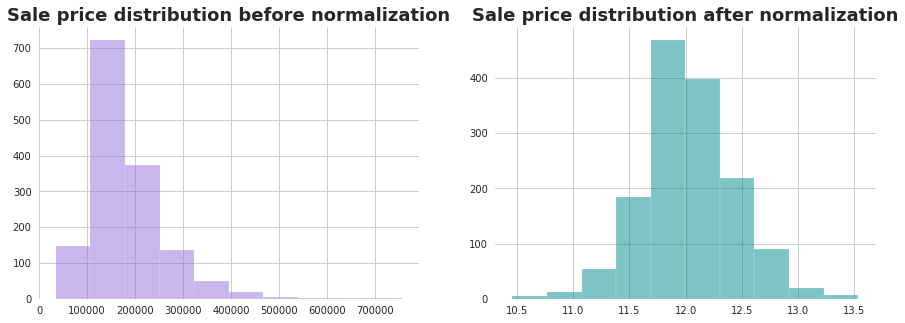

In [51]:
plt.style.use('seaborn')
sns.set_style('whitegrid')
fig = plt.figure(figsize=(15,5))
#1 rows 2 cols
#first row, first col
ax1 = plt.subplot2grid((1,2),(0,0))
plt.hist(a.SalePrice, bins=10, color='mediumpurple',alpha=0.5)
plt.title('Sale price distribution before normalization',weight='bold', fontsize=18)
#first row sec col
ax1 = plt.subplot2grid((1,2),(0,1))
plt.hist(target.SalePrice, bins=10, color='darkcyan',alpha=0.5)
plt.title('Sale price distribution after normalization',weight='bold', fontsize=18)
plt.show()

In [52]:
print("Skewness after log transform: ", target['SalePrice'].skew())
print("Kurtosis after log transform: ",target['SalePrice'].kurt())

Skewness after log transform:  0.12299462625720967
Kurtosis after log transform:  0.8062416349541652


The skewness and kurtosis values look fine after log transform. We can now move forward to Machine Learning.

*P.S.To get our original SalePrice values back, we will apply **np.expm1** at the end of the study to cancel the log1p transformation after training and testing the models.*

# 6- Machine Learning:
***
> ### 6.1 Preprocessing

We start machine learning by setting the features and target:
* Features: x
* Target: y

In [53]:
x=train
y=np.array(target)

Then, we split them to train and test sets

In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = .3, random_state=0)

We use RobustScaler to scale our data because it's powerful against outliers, we already detected some but there must be some other outliers out there, I will try to find them in future versions of the kernel

In [55]:
from sklearn.preprocessing import RobustScaler
scaler= RobustScaler()
# transform "x_train"
x_train = scaler.fit_transform(x_train)
# transform "x_test"
x_test = scaler.transform(x_test)
#Transform the test set
X_test= scaler.transform(Test)

We first start by trying the very basic regression model: Linear regression. 
* We use 5- Fold cross validation for a better error estimate:
 
> ### 6.2 Linear regression


In [56]:
#from sklearn.linear_model import LinearRegression

#lreg=LinearRegression()
#MSEs=ms.cross_val_score(lreg, x, y, scoring='neg_mean_squared_error', cv=5)
#meanMSE=np.mean(MSEs)
#print(meanMSE)
#print('RMSE = '+str(math.sqrt(-meanMSE)))

* Our goal is to minimize the error, we use regularization methods: Ridge, Lasso and ElasticNet, in order to lower the squared error

> ### 6.3 Regularization: 

>> ## Ridge regression:
* Minimize squared error + a term **alpha** that penalizes the error
* We need to find a value of **alpha** that minimizes the train and test error (avoid overfitting)

In [57]:
import sklearn.model_selection as GridSearchCV
from sklearn.linear_model import Ridge

ridge=Ridge()
parameters= {'alpha':[x for x in range(1,101)]}

ridge_reg=ms.GridSearchCV(ridge, param_grid=parameters, scoring='neg_mean_squared_error', cv=15)
ridge_reg.fit(x_train,y_train)
print("The best value of Alpha is: ",ridge_reg.best_params_)
print("The best score achieved with Alpha=11 is: ",math.sqrt(-ridge_reg.best_score_))
ridge_pred=math.sqrt(-ridge_reg.best_score_)

The best value of Alpha is:  {'alpha': 21}
The best score achieved with Alpha=11 is:  0.11509893227706909


In [58]:
ridge_mod=Ridge(alpha=15)
ridge_mod.fit(x_train,y_train)
y_pred_train=ridge_mod.predict(x_train)
y_pred_test=ridge_mod.predict(x_test)

print('Root Mean Square Error train = ' + str(math.sqrt(sklm.mean_squared_error(y_train, y_pred_train))))
print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, y_pred_test))))   

Root Mean Square Error train = 0.09358592359652472
Root Mean Square Error test = 0.1146251950211607


* Next we try Lasso regularization: Similar procedure as ridge regularization but Lasso tends to have a lot of 0 entries in it and just few nonzeros (easy selection). In other words, lasso drops the uninformative features and keeps just the important ones.
* As with Ridge regularization, we need to find the **alpha** parameter that penalizes the error

>> ## Lasso regression

In [59]:
from sklearn.linear_model import Lasso

parameters= {'alpha':[0.0001,0.0009,0.001,0.002,0.003,0.01,0.1,1,10,100]}


lasso=Lasso()
lasso_reg=ms.GridSearchCV(lasso, param_grid=parameters, scoring='neg_mean_squared_error', cv=15)
lasso_reg.fit(x_train,y_train)

print('The best value of Alpha is: ',lasso_reg.best_params_)

The best value of Alpha is:  {'alpha': 0.0009}


In [60]:
lasso_mod=Lasso(alpha=0.0009)
lasso_mod.fit(x_train,y_train)
y_lasso_train=lasso_mod.predict(x_train)
y_lasso_test=lasso_mod.predict(x_test)

print('Root Mean Square Error train = ' + str(math.sqrt(sklm.mean_squared_error(y_train, y_lasso_train))))
print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, y_lasso_test))))

Root Mean Square Error train = 0.0994713946919462
Root Mean Square Error test = 0.11164538594890563


* We check next, the important features that our model used to make predictions
* The number of uninformative features that were dropped. Lasso give a 0 coefficient to the useless features, we will use the coefficient given to the important feature to plot the graph

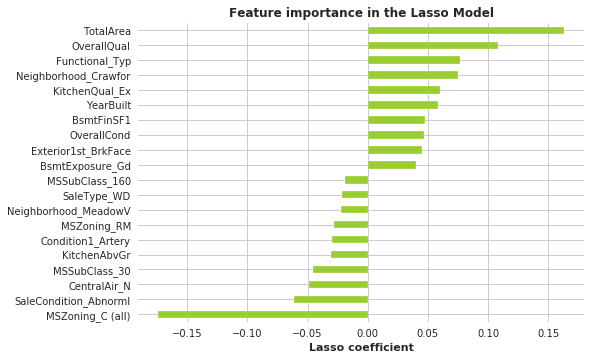

In [61]:
coefs = pd.Series(lasso_mod.coef_, index = x.columns)

imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh", color='yellowgreen')
plt.xlabel("Lasso coefficient", weight='bold')
plt.title("Feature importance in the Lasso Model", weight='bold')
plt.show()

Nice! The most important feature is the new feature we created "**TotalArea**". 
* Other features such as neighborhood or overall quality are among the main important features.

In [62]:

print("Lasso kept ",sum(coefs != 0), "important features and dropped the other ", sum(coefs == 0)," features")

Lasso kept  86 important features and dropped the other  215  features


Next, we try ElasticNet. A regressor that combines both ridge and Lasso.
We use cross validation to find:
* Alpha
* Ratio between Ridge and Lasso, for a better combination of both

>> ## ElasticNet

In [63]:
from sklearn.linear_model import ElasticNetCV

#alphas = [10,1,0.1,0.01,0.001,0.002,0.003,0.004,0.005,0.00054255]
#l1ratio = [0.1, 0.3,0.5, 0.9, 0.95, 0.99, 1]

#elastic_cv = ElasticNetCV(cv=5, max_iter=1e7, alphas=alphas,  l1_ratio=l1ratio)

#elasticmod = elastic_cv.fit(x_train, y_train.ravel())
#ela_pred=elasticmod.predict(x_test)
#print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, ela_pred))))
#print(elastic_cv.alpha_)

I tried numberers that round alpha=0.0005 and found out that 0.0005425 gives the best score, so we continue with alpha=0.0005425

In [64]:
from sklearn.linear_model import ElasticNetCV

alphas = [0.000542555]
l1ratio = [0.1, 0.3,0.5, 0.9, 0.95, 0.99, 1]

elastic_cv = ElasticNetCV(cv=5, max_iter=1e7, alphas=alphas,  l1_ratio=l1ratio)

elasticmod = elastic_cv.fit(x_train, y_train.ravel())
ela_pred=elasticmod.predict(x_test)
print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, ela_pred))))
print(elastic_cv.alpha_)
print(elastic_cv.l1_ratio_)



Root Mean Square Error test = 0.11217633023910258
0.000542555
0.9


<h1>REGULARIZATION RECAP <span class="label label-danger">Function</span></h1>
***
In regularization we worked with 3 algorithms: Ridge (L2), Lasso (L1) an ElasticNet that is a combination of both L2 and L1 regressors.
Before moving to the next section of this work, I would like to introduce a function that does all the work we did above in details **just with one line of code.** The function does all the regression pipeline:



1.  Split the data to train/test
1.  Scale the data
1.  Gridsearch for the best hyperparameters
1.  Predict the target
1.  Evaluate the prediction


The function takes as input parameters:
- x: the features
- y: the target
- modelo: Ridge(default), Lasso, ElasticNetCV
- scaler: RobustScaler(default), MinMaxSclaer, StandardScaler


<h4>In future versions, I will include more input parameters in this function to make it more flexible such as: The personalization of the hyperparameters search. <span class="label label-info">WORK IN PROGRESS</span></h4>




In [65]:
def regularization(x,y,modelo=Ridge, scaler=RobustScaler):
    """"
    Function to automate regression with regularization techniques.
    x expects the features
    y expects the target
    modelo: Ridge(default), Lasso, ElasticNetCV
    scaler: RobustSclaer(default), MinMaxSclaer, StandardScaler
    SOURCE: https://www.kaggle.com/amiiiney/price-prediction-regularization-stacking
    Contact: amineyamlahi@gmail.com
    """
    #Split the data to train/test
    from sklearn.model_selection import train_test_split
    x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = .3, random_state=0)
    
    #Scale the data. RobustSclaer default
    from sklearn.preprocessing import RobustScaler
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.preprocessing import StandardScaler
    
    scaler= scaler()
    # transform "x_train"
    x_train = scaler.fit_transform(x_train)
    # transform "x_test"
    x_test = scaler.transform(x_test)
    #Transform the test set
    X_test= scaler.transform(Test)
    
    if modelo != ElasticNetCV:
        if modelo == Ridge:
            parameters= {'alpha':[x for x in range(1,101)]}
        elif modelo == Lasso:
            parameters= {'alpha':[0.0001,0.0009,0.001,0.002,0.003,0.01,0.1,1,10,100]}
            
        model=modelo()
            
        model=ms.GridSearchCV(model, param_grid=parameters, scoring='neg_mean_squared_error', cv=15)
        model.fit(x_train,y_train)
        y_pred= model.predict(x_test)

        #print("The best value of Alpha is: ",model.best_params_)
        print("The best RMSE score achieved with %s is: %s " %(model.best_params_,
                  str(math.sqrt(sklm.mean_squared_error(y_test, y_pred)))))
    elif modelo == ElasticNetCV:
        alphas = [0.000542555]
        l1ratio = [0.1, 0.3,0.5, 0.9, 0.95, 0.99, 1]

        elastic_cv = ElasticNetCV(cv=5, max_iter=1e7, alphas=alphas,  l1_ratio=l1ratio)

        elasticmod = elastic_cv.fit(x_train, y_train.ravel())
        ela_pred=elasticmod.predict(x_test)
        print("The best RMSE score achieved with alpha %s and l1_ratio %s is: %s "
              %(elastic_cv.alpha_,elastic_cv.l1_ratio_,
            str(math.sqrt(sklm.mean_squared_error(y_test, ela_pred)))))
        
            

  

In [66]:
regularization(x,y,Ridge)

The best RMSE score achieved with {'alpha': 21} is: 0.11458998420338307 


In [67]:
regularization(x,y, Lasso)

The best RMSE score achieved with {'alpha': 0.0009} is: 0.11164538594890563 


In [68]:
regularization(x,y, ElasticNetCV)

The best RMSE score achieved with alpha 0.000542555 and l1_ratio 0.9 is: 0.11217633023910258 


> ### 6.4 XGB and ExtraTrees regressors:

We will try other kind of regressors, such as XGBRegressor and ExtraTreesRegressor

In [69]:
from xgboost.sklearn import XGBRegressor

#xg_reg = XGBRegressor()
#xgparam_grid= {'learning_rate' : [0.01],'n_estimators':[2000, 3460, 4000],
#                                     'max_depth':[3], 'min_child_weight':[3,5],
#                                     'colsample_bytree':[0.5,0.7],
#                                     'reg_alpha':[0.0001,0.001,0.01,0.1,10,100],
#                                    'reg_lambda':[1,0.01,0.8,0.001,0.0001]}

#xg_grid=GridSearchCV(xg_reg, param_grid=xgparam_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
#xg_grid.fit(x_train,y_train)
#print(xg_grid.best_estimator_)
#print(xg_grid.best_score_)

The gridSearch above tunes the hyperparamaters, but it takes forever to run. I copy the best estimator results to the model below. Feel free to uncomment and check it out.

In [70]:
xgb= XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=3, min_child_weight=0, missing=None, n_estimators=4000,
             n_jobs=1, nthread=None, objective='reg:squarederror', random_state=0,
             reg_alpha=0.0001, reg_lambda=0.01, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
xgmod=xgb.fit(x_train,y_train)
xg_pred=xgmod.predict(x_test)
print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, xg_pred))))

Root Mean Square Error test = 0.11427660036993537


> ### 6.5 ENSEMBLE METHODS:
>> ## VOTING REGRESSOR:
* A voting regressor is an ensemble meta-estimator that fits base regressors each on the whole dataset. It, then, averages the individual predictions to form a final prediction.

* After running the regressors, we combine them first with voting regressor in order to get a better model

In [71]:
from sklearn.ensemble import VotingRegressor

vote_mod = VotingRegressor([('Ridge', ridge_mod), ('Lasso', lasso_mod), ('Elastic', elastic_cv), 
                            ('XGBRegressor', xgb)])
vote= vote_mod.fit(x_train, y_train.ravel())
vote_pred=vote.predict(x_test)

print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, vote_pred))))

Root Mean Square Error test = 0.10889360773031906


>> ## STACKING REGRESSOR:

We stack all the previous models, including the votingregressor with XGBoost as the meta regressor:

In [72]:
from mlxtend.regressor import StackingRegressor


stregr = StackingRegressor(regressors=[elastic_cv,ridge_mod, lasso_mod, vote_mod], 
                           meta_regressor=xgb, use_features_in_secondary=True
                          )

stack_mod=stregr.fit(x_train, y_train.ravel())
stacking_pred=stack_mod.predict(x_test)

print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, stacking_pred))))

Root Mean Square Error test = 0.10914569188811764


* Last thing to do is average our regressors and fit them on the testing dataset

>> ## Averaging Regressors

In [73]:
final_test=(0.3*vote_pred+0.5*stacking_pred+ 0.2*y_lasso_test)
print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, final_test))))


Root Mean Square Error test = 0.1075073421268465


Averaging the 3 best models: Stacking, Voting and Lasso gave the best results: **The lowest RMSE**
* The coefficients assigned to the 3 models were tested manually, the models combination above gave the best RMSE score

> ### 6.6 Fit the model on test data

Now, we fit the models on the test data and then submit it to the competition

* We apply **np.expm1** to cancel the **np.logp1** *(we did previously in data processing)* and convert the numbers to their original form

In [74]:
#VotingRegressor to predict the final Test
vote_test = vote_mod.predict(X_test)
final1=np.expm1(vote_test)

#StackingRegressor to predict the final Test
stack_test = stregr.predict(X_test)
final2=np.expm1(stack_test)

#LassoRegressor to predict the final Test
lasso_test = lasso_mod.predict(X_test)
final3=np.expm1(lasso_test)


Blending and submitting the **FINAL AVERAGE OF 3 REGRESSORS**

In [75]:
#Submission of the results predicted by the average of Voting/Stacking/Lasso
final=(0.2*final1+0.6*final2+0.2*final3)

final_submission = pd.DataFrame({
        "Id": b["Id"],
        "SalePrice": final
    })
final_submission.to_csv("final_submission.csv", index=False)
final_submission.head()

,Id,SalePrice
0,1461,122698.215110
1,1462,156376.370716
2,1463,183260.598853
3,1464,197760.402743
4,1465,186495.147222


## If you made it this far, thank you for your attention.
 **In order to improve my LB score, I will keep updating this kernel by:**
* **Creating new features**
* **Detecting other outliers**
* **Trying new regressors and stacking/blending them**